# A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in 
Keras to solve this and check the accuracy scores.

Dataset to be used: keras.datasets.fashion_mnist

# Load tensorflow

In [0]:
import warnings
import tensorflow as tf

In [2]:
tf.__version__

'1.15.0'

# Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX,testY) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
trainX.shape

(60000, 28, 28)

In [6]:
testY.shape

(10000,)

In [7]:
testY.view()

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Convert both training and testing labels into one-hot vectors.

Hint: check tf.keras.utils.to_categorical()

In [0]:
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)
testY = tf.keras.utils.to_categorical(testY,num_classes=10)

Expected output should look like

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Visualize the data
Plot first 10 images in the triaining set and their labels.

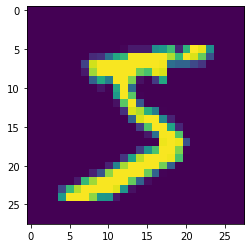

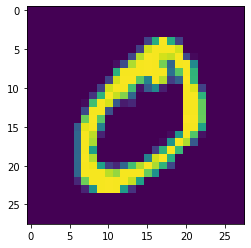

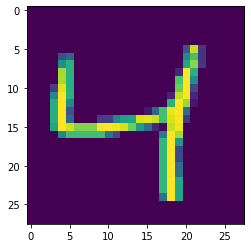

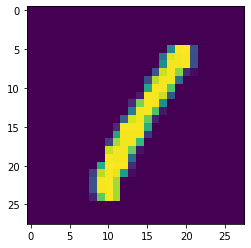

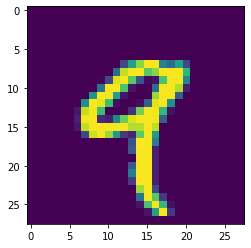

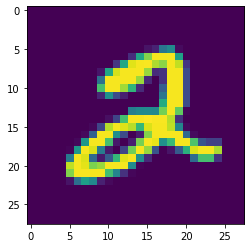

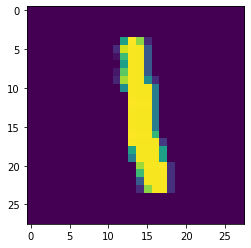

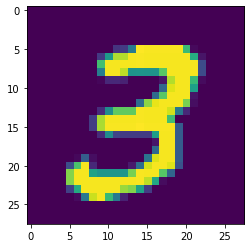

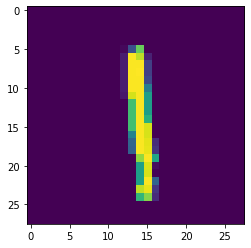

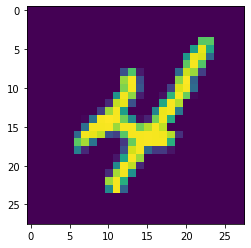

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    image = trainX[i]
    plt.figure(i)
    plt.imshow(image)

# Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize sequenial model
model = tf.keras.models.Sequential()

In [0]:
#Reshape data from 2D to 1D ->28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [13]:
#Add Dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

# Execute the model using model.fit()

In [15]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 8us/sample - loss: 174.2854 - acc: 0.1265 - val_loss: 1887.4852 - val_acc: 0.3126
Epoch 2/10
60000/60000 [==============================] - 0s 4us/sample - loss: 1870.4572 - acc: 0.3093 - val_loss: 3150.2637 - val_acc: 0.2076
Epoch 3/10
60000/60000 [==============================] - 0s 4us/sample - loss: 3089.4385 - acc: 0.2041 - val_loss: 3781.9456 - val_acc: 0.4736
Epoch 4/10
60000/60000 [==============================] - 0s 4us/sample - loss: 3729.1145 - acc: 0.4684 - val_loss: 3327.4839 - val_acc: 0.3906
Epoch 5/10
60000/60000 [==============================] - 0s 4us/sample - loss: 3253.8464 - acc: 0.3876 - val_loss: 3068.6113 - val_acc: 0.4718
Epoch 6/10
60000/60000 [==============================] - 0s 4us/sample - loss: 3006.1445 - acc: 0.4690 - val_loss: 2419.1316 - val_acc: 0.3656
Epoch 7/10
60000/60000 [==============================] - 0s 4us/sample - loss: 2407.68

# In the above Neural network model add Batch Normalization layer after the input layer and repeat the steps

In [0]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [0]:
#Reshape data from 2D to 1D ->28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
# Add dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
#compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(trainX,trainY,epochs=20,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4947 - acc: 0.8568 - val_loss: 0.4394 - val_acc: 0.8976
Epoch 2/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3543 - acc: 0.8967 - val_loss: 0.3786 - val_acc: 0.9079
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3352 - acc: 0.9035 - val_loss: 0.4200 - val_acc: 0.9113
Epoch 4/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3240 - acc: 0.9075 - val_loss: 0.3841 - val_acc: 0.9136
Epoch 5/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3182 - acc: 0.9091 - val_loss: 0.3951 - val_acc: 0.9149
Epoch 6/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3134 - acc: 0.9103 - val_loss: 0.3572 - val_acc: 0.9158
Epoch 7/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3076 - acc: 0.9118 - val_loss: 0.

# Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize the sequential model
model=tf.keras.models.Sequential()

In [0]:
#Reshape the data from 2D to 1D -> 28*28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
# Add dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(trainX,trainY,epochs=20,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/sample - loss: 1.0009 - acc: 0.6993 - val_loss: 0.6997 - val_acc: 0.8327
Epoch 2/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5544 - acc: 0.8430 - val_loss: 0.5665 - val_acc: 0.8649
Epoch 3/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4762 - acc: 0.8634 - val_loss: 0.5512 - val_acc: 0.8770
Epoch 4/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4425 - acc: 0.8724 - val_loss: 0.5789 - val_acc: 0.8858
Epoch 5/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4200 - acc: 0.8788 - val_loss: 0.5091 - val_acc: 0.8912
Epoch 6/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4045 - acc: 0.8828 - val_loss: 0.4359 - val_acc: 0.8944
Epoch 7/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3927 - acc: 0.8859 - val_loss: 0.

# Build the Neural Network model with 3 Dense layers with 100,100

In [0]:
#Initialize sequential model
model = tf.keras.models.Sequential()

In [0]:
#Reshape data from 2D to 1D -> 28 X 28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add Dense Layer which provides 200 hidden neurons for 1st layer with sigmoid
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [0]:
#Add Dense Layer which provides 200 hidden neurons for 1st layer with sigmoid
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

In [0]:
#Add Dense Layer which provides 100 hidden neurons for 2nd layer with sigmoid
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

In [0]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
#Add Dense Layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(trainX,trainY,epochs=10,validation_data=(testX,testY),batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 2.3012 - acc: 0.1118 - val_loss: 2.3000 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 6s 101us/sample - loss: 2.3001 - acc: 0.1124 - val_loss: 2.2992 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 6s 104us/sample - loss: 2.2985 - acc: 0.1125 - val_loss: 2.2969 - val_acc: 0.1135
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 2.2942 - acc: 0.1139 - val_loss: 2.2876 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 2.2428 - acc: 0.1718 - val_loss: 2.1426 - val_acc: 0.2191
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 2.0383 - acc: 0.2278 - val_loss: 1.9434 - val_acc: 0.2394
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 1.9163 - acc: 0.2467 - val_l

# Review Model

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)               